Mô hình ARCH

In [1]:
# %% Import Library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import yfinance as yf


In [2]:


# # %% Import Data
df = yf.download('LTC-USD', 
                       start='2014-01-01', 
                       end='2022-01-15',
                       progress=False)
print(f'Downloaded {df.shape[0]} rows of data.')

df.tail()
df.dropna(inplace = True)
returns=100*df['Close'].pct_change().dropna()
returns


Downloaded 2677 rows of data.


Date
2014-09-18   -7.379983
2014-09-19   -7.629499
2014-09-20   -0.955003
2014-09-21   -0.945300
2014-09-22   -0.084083
                ...   
2022-01-10   -3.400272
2022-01-11    3.714434
2022-01-12    7.748083
2022-01-13   -3.598687
2022-01-14    5.919643
Name: Close, Length: 2676, dtype: float64

<AxesSubplot:title={'center':'Lợi nhuận Litecoin 2014 -2022'}, xlabel='Date'>

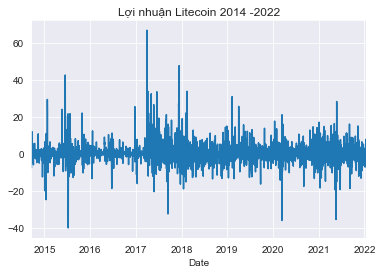

In [3]:
#%% Kiểm tra phương sai thay đổi
returns.plot(title='Lợi nhuận Litecoin 2014 -2022')

In [4]:
#Kiểm định Lagrange Multiplier
arch_test=het_arch(returns)
print('Lagrange Multiplier test statistic: ', arch_test[0])
print('p_value: ', arch_test[1])

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:657: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setmaxlags or period to silence this warning.
  warnings.warn("The default value of nlags is changing.  After 0.12, "


Lagrange Multiplier test statistic:  117.07943796269235
p_value:  7.33815807412672e-13


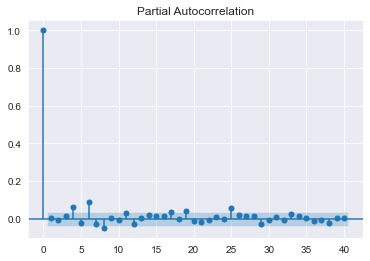

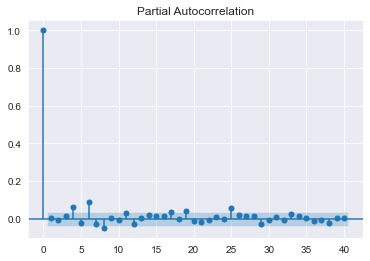

In [5]:
# Biểu đồ PACF xác định bậc mô hình ARCH
plot_pacf(returns, lags=40, alpha=0.05)

In [6]:
# Xây dựng mô hình ARCH(2)
model=arch_model(returns, mean='Zero', vol='ARCH', p=2, o=0, q=0)
model_fitted=model.fit(disp='off')
print(model_fitted)


                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8385.09
Distribution:                  Normal   AIC:                           16776.2
Method:            Maximum Likelihood   BIC:                           16793.9
                                        No. Observations:                 2676
Date:                Tue, Jan 25 2022   Df Residuals:                     2676
Time:                        15:32:44   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         24.0268      3.544      6.779  1.210e-11   [ 17.08

In [7]:
#%% Mô hình GARCH

Import thư viện + đọc file dữ liệu ở trên

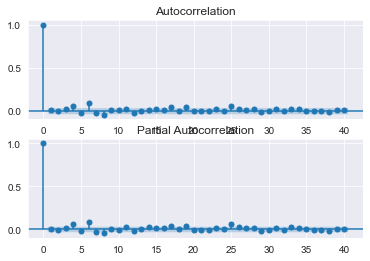

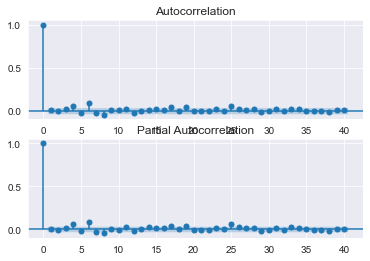

In [8]:
# Xác định tham số "q" cho mô hình bằng cách sử dụng biểu đồ ACF
fig, ax=plt.subplots(2)
plot_acf(returns, ax=ax[0], lags=40, alpha=0.05)
plot_pacf(returns, ax=ax[1], lags=40, alpha=0.05)

In [9]:
# Xây dựng mô hình GARCH (2,2)
model=arch_model(returns, mean='Zero', vol='GARCH', p=2, o=0, q=0)
model_fitted=model.fit(disp='off')
print(model_fitted.summary())


                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8385.09
Distribution:                  Normal   AIC:                           16776.2
Method:            Maximum Likelihood   BIC:                           16793.9
                                        No. Observations:                 2676
Date:                Tue, Jan 25 2022   Df Residuals:                     2676
Time:                        15:32:48   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         24.0276      3.544      6.779  1.210e-11   [ 17.08

Dự báo giá cổ phiếu với phương pháp mô phỏng Monte Carlo

In [10]:
#Nhập dữ liệu
adj_close=df.loc['2021-01-01':'2021-12-31', 'Close']
adj_close.head()


Date
2021-01-01    126.230347
2021-01-02    136.944885
2021-01-03    160.190582
2021-01-04    154.807327
2021-01-05    158.594772
Name: Close, dtype: float64

In [11]:
returnss = adj_close.pct_change().dropna()

Text(0.5, 1.0, 'Litecoin return 2021')

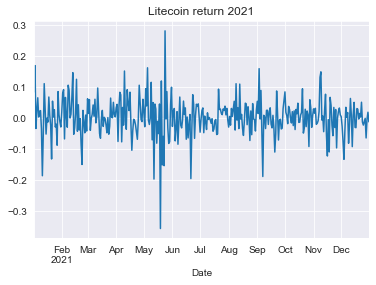

In [12]:
# Vẽ biểu đồ dữ liệu
ax=returnss.plot()
ax.set_title('Litecoin return 2021')

In [13]:
# Chia dữ liệu thành 2 giai đoạn 
train=returnss['2021-01-01':'2021-11-30']
test=returnss['2021-12-01':'2022-01-15']

In [14]:
# Tính toán thông số cho phương trình mô phỏng
#Độ dài của giai đoạn mô phỏng
T=len(test)
#Số điểm dữ liệu trong giai đoạn mô phỏng
N=len(test)
#Gía trị đầu cho giai đoạn mô phỏng
S_0=adj_close[train.index[-1]]
# Số lần mô phỏng
N_SIM=100
# Gía trị trung bình và độ lệch chuẩn trong giai đoạn đánh giá
mu=train.mean()
sigma=train.std()


In [15]:
# Thực hiện tạo hàm theo công thức SDE

def simulate(s_0, mu, sigma, n_sims, T, N, random_seed=1):
    np.random.seed(random_seed) #tao random seed để tránh việc thay đổi kết quả
    dt=T/N #xác định số điểm dữ liệu mô phỏng
    dW=np.random.normal(scale=np.sqrt(dt), size=(n_sims, N)) #xác định tham số ngẫu nhiên Brownian Motion
    W=np.cumsum(dW, axis=1)
    time_step=np.linspace(dt, T, N) #Tạo ma trận để lưu kết quả
    time_steps=np.broadcast_to(time_step, (n_sims, N))
    S_t =s_0*np.exp((mu-0.5*sigma**2)*time_steps + sigma*W) # Thiết lập công thức SDE
    S_t=np.insert(S_t, 0, s_0, axis=1) # Chèn giá trị khởi điểm vào đầu kết quả mô phỏng
    return S_t
    
    


In [16]:
# Thực hiện mô phỏng
gbm_sim = simulate(S_0, mu, sigma, N_SIM, T, N)

Thực hiện vẽ biểu đồ dữ liệu mô phỏng

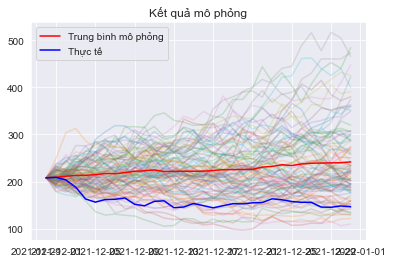

In [17]:
# Xác định mốc thời gian trên biểu đồ
last_train_date=train.index[-1].date()
first_test_date=test.index[0].date()
last_test_date=test.index[-1].date()

#Chuyển đổi kết quả mô phỏng từ dạng ma trận
indices=adj_close[last_train_date:last_test_date].index
index=[date.date() for date in indices]
gbm_sim_df=pd.DataFrame(np.transpose(gbm_sim), index=index)
ax=gbm_sim_df.plot(alpha=0.2, legend=False)

# Thực hiện vẽ biểu đồ
# Đường trung bình mô phỏng
line_1, =ax.plot(index, gbm_sim_df.mean(axis=1), color='red')
# Đường giá trị thực tế
line_2, =ax.plot(index, adj_close[last_train_date:last_test_date], color='blue')
ax.set_title('Kết quả mô phỏng')
ax.legend((line_1, line_2), ('Trung bình mô phỏng', 'Thực tế'))
plt.show()